In [1]:
import pandas as pd
import re #regular expression matching for removing unwanted columns by name
import natsort as ns #3rd party package for natural sorting

import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
%run ./executible/Cu_transition_functionalized.py #running basic preprocessing functions

# Data Cleanup 

In [5]:
df2_cleaned_up = raw_data_cleanup_v1("5G_count_all.tsv")

5G_count_all.tsv was located in the raw_data directory
5G_count_all.tsv was imported into dataframe


In [8]:
df2_cleaned_up.head()

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM23_TR3,FM18_CH3OH_4.1/day,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,conserved protein of unknown function,CDS,NaN,MBURv2,1965161,1965952,Evidence 4 : Homologs of previously reported g...,NaN,205,428,...,124,34,707,89,531,58,537,499,469,505
MBURv2_100002,conserved protein of unknown function,CDS,NaN,MBURv2,1966190,1966369,Evidence 4 : Homologs of previously reported g...,NaN,29,40,...,3,1,67,2,55,3,38,35,35,34
MBURv2_100003,protein of unknown function,CDS,NaN,MBURv2,1966931,1967041,Evidence 5 : No homology to any previously rep...,NaN,9,30,...,0,2,132,0,88,0,75,65,62,75
MBURv2_10001,protein of unknown function,CDS,NaN,MBURv2,116,289,Evidence 5 : No homology to any previously rep...,NaN,83,119,...,8,4,82,13,82,9,51,62,39,48
MBURv2_10002,KfrB,CDS,kfrB,MBURv2,497,844,NaN,NaN,311,422,...,241,71,863,88,1140,97,849,893,803,812


# Running TPM function on all the data columns


In [9]:
columns = df2_cleaned_up.loc[:,"5GB1_FM23_TR3":].columns
df3_TPM = TPM_counts(df2_cleaned_up,"start_coord","end_coord",columns)

In [10]:
df3_TPM.describe()

,start_coord,end_coord,translation,5GB1_FM23_TR3,FM18_CH3OH_4.1/day,FM18_CH3OH_4.1/day_R1,FM20_no-lim_5.2/day,FM20_no-lim_5.2/day_R1,FM21_no-lim_5.4/day,FM21_no-lim_5.4/day_R1,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
count,4410.000000,4410.000000,0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2523912.507710,2524848.262585,NaN,226.579561,226.594462,226.614222,226.640546,226.670783,226.674970,226.643890,...,226.701056,226.478675,226.619799,226.656859,226.639200,226.669471,226.621403,226.671840,226.611351,226.641795
std,1471366.679738,1471365.070314,NaN,1173.455830,1246.618739,1229.043510,1142.302203,1309.801506,1527.540055,1225.235566,...,1278.153592,1689.067908,852.711897,961.203136,886.788434,1031.382391,1853.042470,2257.083911,2171.823335,2335.694880
min,116.000000,289.000000,NaN,0.859233,0.235129,0.955192,0.680129,0.767703,0.460181,0.578988,...,0.252605,0.307564,0.460213,0.258172,0.595752,0.499358,0.425033,0.260284,0.292619,0.133282
25%,1228352.750000,1230090.250000,NaN,46.779512,43.295853,42.741254,31.752107,30.702504,29.772546,31.385190,...,25.814103,25.926432,43.846216,40.666093,40.565853,36.735500,29.205567,27.695767,25.694216,25.465356
50%,2563815.000000,2564586.500000,NaN,86.733067,83.877066,82.371945,70.537975,69.639492,66.982056,69.018329,...,61.800981,54.978619,88.836154,85.168114,83.057404,79.945110,63.333797,57.787861,54.602911,53.411146
75%,3796009.000000,3796603.500000,NaN,167.315283,162.001032,162.020610,148.009662,143.099939,138.470472,145.182094,...,134.177414,119.561131,181.236091,181.801985,170.466673,169.211265,134.683314,122.109008,117.209644,114.548974
max,5066062.000000,5067294.000000,NaN,56442.283716,58854.542337,64511.010158,43868.126939,60872.059897,70342.920695,46683.284376,...,52180.163782,67782.247729,34011.023480,45993.371170,32009.972921,48308.374057,72440.558616,82521.405047,78842.758879,85322.678975


# Log 2 transform the data

In [11]:
df4_log2 = log_2_transform(df3_TPM,'5GB1_FM23_TR3','FM81_O2-lim_0.7/day_t2')

In [12]:
df4_log2.describe() 

,5GB1_FM23_TR3,FM18_CH3OH_4.1/day,FM18_CH3OH_4.1/day_R1,FM20_no-lim_5.2/day,FM20_no-lim_5.2/day_R1,FM21_no-lim_5.4/day,FM21_no-lim_5.4/day_R1,FM21_no-lim_5.4/day_R2,FM12_CH4-lim_3.0/day,FM12_CH4-lim_3.0/day_R1,...,FM34_+Cu_2.7/day_t480m,FM69_O2-lim+_0.7/day_t2,FM69_?-lim_0.7/day_t3,FM69_?-lim_0.7/day_t3_R1,FM69_?-lim_0.7/day_t4,FM69_?-lim_0.7/day_t4_R2,FM80_O2-lim_0.7/day_t2,FM80_O2-lim_0.7/day_t4,FM81_O2-lim+_0.7/day_t1,FM81_O2-lim_0.7/day_t2
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,6.480499,6.408118,6.397127,6.172266,6.130689,6.076451,6.142814,6.082379,5.711915,5.741699,...,5.960253,5.860053,6.502010,6.432218,6.421580,6.328392,6.028309,5.917774,5.843949,5.814913
std,1.660733,1.712715,1.718178,1.877034,1.887674,1.880596,1.878769,1.885126,1.899290,1.892151,...,1.999880,1.940379,1.744247,1.820505,1.770239,1.850275,1.860058,1.818609,1.851847,1.847486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.547805,5.436157,5.417557,4.988780,4.940284,4.895911,4.972012,4.902766,4.580154,4.623007,...,4.690087,4.696352,5.454380,5.345754,5.342193,5.199102,4.868171,4.791594,4.683372,4.670464
50%,6.438510,6.390204,6.364081,6.140328,6.121834,6.065703,6.108908,6.077567,5.699473,5.732226,...,5.949558,5.780799,6.473075,6.412242,6.376037,6.320938,5.984904,5.852695,5.770906,5.739069
75%,7.386425,7.339859,7.340033,7.209547,7.160878,7.113435,7.181720,7.121166,6.777976,6.811096,...,7.067998,6.901605,7.501726,7.506224,7.413346,7.402682,7.073427,6.932025,6.872947,6.839821
max,15.784489,15.844866,15.977258,15.420885,15.893493,16.102118,15.510618,16.032552,16.642329,16.688454,...,15.671214,16.048620,15.053715,15.489138,14.966234,15.559986,16.144510,16.332481,16.266691,16.380642


# Taking log2 ratio (fm23 is the baseline)

In [13]:
df5_log2_ratio = df4_log2.subtract(df4_log2['5GB1_FM23_TR3'], axis = "index")

In [14]:
df5_log2_ratio = df5_log2_ratio.drop(['5GB1_FM23_TR3'], axis = 1) #removing because subtracted from itself 

In [15]:
df5_log2_ratio = df5_log2_ratio.drop(['FM40_+Cu_2.9/day_t150m'], axis = 1) #removing because its remake and is unexpected
                                                                            #expression, suspect something wrong 

In [16]:
df5_log2_ratio.columns

Index(['FM18_CH3OH_4.1/day', 'FM18_CH3OH_4.1/day_R1', 'FM20_no-lim_5.2/day',
       'FM20_no-lim_5.2/day_R1', 'FM21_no-lim_5.4/day',
       'FM21_no-lim_5.4/day_R1', 'FM21_no-lim_5.4/day_R2',
       'FM12_CH4-lim_3.0/day', 'FM12_CH4-lim_3.0/day_R1',
       'FM14_CH4-lim_3.0/day', 'FM14_CH4-lim_3.0/day_R1',
       'FM19_O2-lim_3.5.day', 'FM19_O2-lim_3.5.day_R1',
       'FM19_O2-lim_3.5.day_R2', 'FM22_O2-lim_4.2/day',
       'FM22_O2-lim_4.2/day_R1', 'FM22_O2-lim_4.2/day_R2',
       'FM34_-Cu_2.7/day_t0', 'FM40_-Cu_2.9/day_t0m', 'FM40_+Cu_2.9/day_t10m',
       'FM40_+Cu_2.9/day_t20m', 'FM40_+Cu_2.9/day_t40m',
       'FM40_+Cu_2.9/day_t60m', 'FM40_+Cu_2.9/day_t90m',
       'FM40_+Cu_2.9/day_t180m', 'FM34_+Cu_2.7/day_t180m',
       'FM34_+Cu_2.7/day_t240m', 'FM34_+Cu_2.7/day_t300m',
       'FM34_+Cu_2.7/day_t360m', 'FM34_+Cu_2.7/day_t420m',
       'FM34_+Cu_2.7/day_t480m', 'FM69_O2-lim+_0.7/day_t2',
       'FM69_?-lim_0.7/day_t3', 'FM69_?-lim_0.7/day_t3_R1',
       'FM69_?-lim_0.7/day_t4',

# Clustering log2(ratio)

In [17]:
from sklearn.cluster import KMeans

X = df5_log2_ratio

kmeans = KMeans(n_clusters=20, max_iter=300, random_state=4) 
kmeans.fit(X)

#15 clusters and random_state = 3 gives good cluster
#20 cluster and random_state = 4 gives good cluster as well

#gonna stick with 20 clusters and explore these profiles

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=4, tol=0.0001,
    verbose=0)

In [18]:
labels_kmeans = kmeans.labels_
print(np.unique(labels_kmeans)) # unique bins
print(np.bincount(labels_kmeans[labels_kmeans!=-1])) #genes in each bin/cluster

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[510 236 517 167  69  10 447  20   6 501 385 176 413 257  19 197 399  38
  18  25]


In [19]:
#Adding cluster labels to gene dataframe
clusters_df = pd.DataFrame(labels_kmeans, index = df5_log2_ratio.index)
clusters_df.rename(columns = {0:"cluster"}, inplace = True)
df6_clusters = pd.concat([df5_log2_ratio, clusters_df], axis = 1)

In [20]:
#Mary has a list of genes that are known to be Cu repressible. all transcribed in same direction. 
# genes #43 - 52 should be in a single cluster. 
# genes #53 - 56 & #42 should be in another. 
# According to expression pattern. 
Marys_list_full = ["MBURv2_130042",
                    "MBURv2_130043",
                    "MBURv2_130044",
                    "MBURv2_130045",
                    "MBURv2_130046",
                    "MBURv2_130047",
                    "MBURv2_130048",
                    "MBURv2_130049",
                    "MBURv2_130050",
                    "MBURv2_130051",
                    "MBURv2_130052",
                    "MBURv2_130053",
                    "MBURv2_130054",
                    "MBURv2_130055",
                    "MBURv2_130056"]

Marys_list_high = ["MBURv2_130043","MBURv2_130044","MBURv2_130045","MBURv2_130046","MBURv2_130047",
"MBURv2_130048","MBURv2_130049","MBURv2_130050","MBURv2_130051","MBURv2_130052"]
Marys_list_low = ["MBURv2_130042","MBURv2_130053","MBURv2_130054","MBURv2_130055","MBURv2_130056"]

In [21]:
#what clusters do these belong to? 
print("Clusters of highly expressed in list", list(df6_clusters.loc[Marys_list_high,"cluster"]))
print("Clusters of lower expressed in list", list(df6_clusters.loc[Marys_list_low,"cluster"]))

Clusters of highly expressed in list [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Clusters of lower expressed in list [2, 9, 2, 2, 10]


### Important note:
    The lower expressed genes from Mary's list are split between clusters 2, 9, and 10. These are noise clusters - it is improtant to review these noise cluster by hand and to pick out genes that express a trend during the time course. I have generated plots to do just that. 

# Silhouette analysis for optimal K value

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [23]:
labels_kmeans = kmeans.labels_
X = df5_log2_ratio.values

silhouette_ave = silhouette_score(X, labels_kmeans)

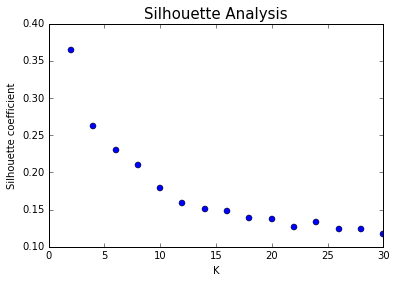

In [24]:
def silhouette_score_rev01(df,k):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    k_values_array = np.array([])
    silhouette_array = np.array([])

    #k_list = [2,4,6,8,10,12]
    k_list = list(range(2,k+2,2))

    for i in k_list:
        #K-means for range of clusters 
        kmeans = KMeans(n_clusters=i, max_iter=300, random_state=3) #15 clusters and random_stat = 3 gives good cluster
        kmeans.fit(df)
        labels_kmeans = kmeans.labels_
        #Silhouette score for every k computed
        silhouette_ave = silhouette_score(df.values, labels_kmeans)
    
        #x and y axis to plot k value and silhouette score 
        k_values_array = np.append(k_values_array, [int(i)])
        silhouette_array = np.append(silhouette_array, [silhouette_ave])
    
    
    ax.set_ylabel("Silhouette coefficient", fontsize = 10)
    ax.set_xlabel("K", fontsize = 10)
    ax.set_title("Silhouette Analysis", fontsize = 15)
    
    plt.plot(k_values_array, silhouette_array, "bo")
    
    fig.savefig("Silhouette Analysis.pdf")  

silhouette_score_rev01(df5_log2_ratio,30)

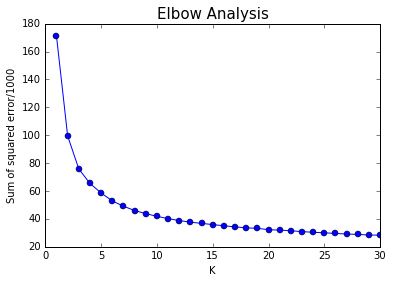

In [25]:
#Elbow method for cluster finding - stolen from the interwebs. 
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,31) 
KM = [KMeans(n_clusters=k).fit(df5_log2_ratio) for k in K] 
centroids = [k.cluster_centers_ for k in KM] 

D_k = [cdist(df5_log2_ratio, cent, 'euclidean') for cent in centroids] 
                        
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/df5_log2_ratio.shape[0] for d in dist] #not plotting this

# Total with-in sum of square
wcss = [sum(d**2)/1000 for d in dist]
tss = sum(pdist(df5_log2_ratio)**2)/df5_log2_ratio.shape[0]
bss = tss-wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, wcss, 'bo-')
#ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
#markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
#plt.grid(True)
plt.xlabel('K', fontsize = 10)
plt.ylabel('Sum of squared error/1000', fontsize = 10)
plt.title('Elbow Analysis', fontsize = 15)

fig.savefig("Elbow Analysis for Kmeans.pdf")  

In [ ]:
"""
#breaking down the code, non list version of the code.
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = 10
KM = KMeans(n_clusters=K).fit(df5_log2_ratio) #a list of Kmeans objects for every k in wanted range
centroids = KM.cluster_centers_  #list of (list of centroids) - one list for every k value in the Kmeans object

D_k = cdist(df5_log2_ratio, centroids, 'euclidean')  #scipy dist pacakge - euclidean distance between
                    #centroid and every samples i.e. [all dist to centroid 1(4410,1), all dist to centroid 2 (4410,1)]
                    #interesting that cdist accepts both a list and a dataframe.
        
dist = np.min(D_k,axis=1) #euclidean distance from gene to its cluster center 
avgWithinSS = sum(dist)/df5_log2_ratio.shape[0] #sum of all distances/ number of genes



wcss = sum(dist**2) #all the distances from gene to center squard and added up

tss = sum(pdist(df5_log2_ratio)**2)/df5_log2_ratio.shape[0] #pdist creates a list of all the distances between every 
                                            #pair of genes. It removes the diagnal distance 0, and the duplicate half
                                            #of the matrix. Use scipy.spacial.distance.sqiareform to create a matrix
        #every distance between pair of genes squared and summed divided by total gene count
        
        
#bss = tss-wcss
"""

# Plotting the resulting clusters

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

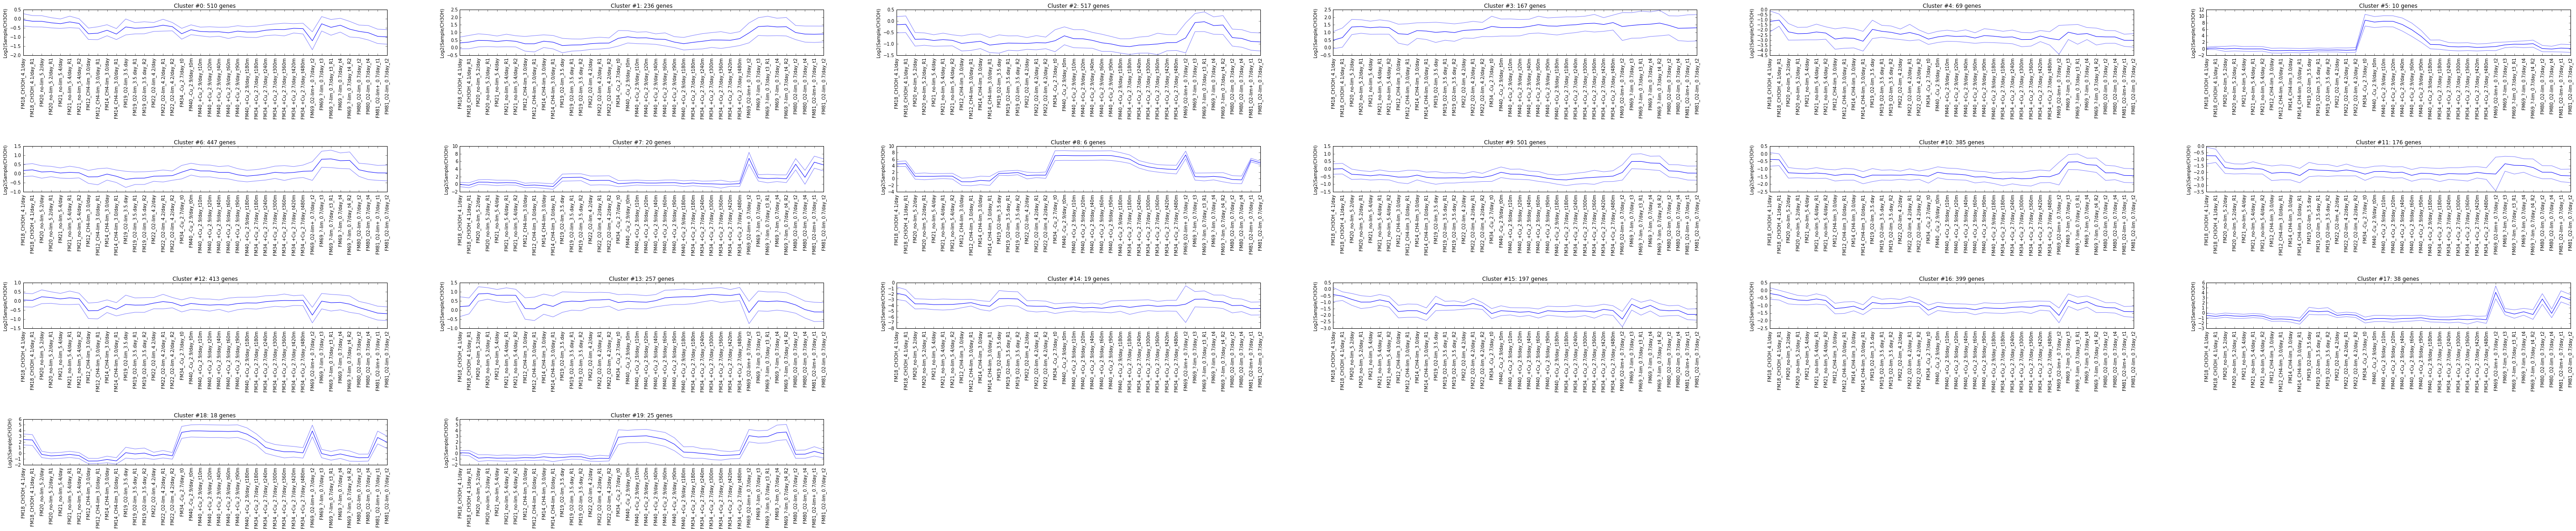

In [27]:
def draw_clust_means(df, n_rows, n_cols):
    
    """
    Draw scatter plot of mean gene expression level for genes in that cluster.
    Will include 1 standard deviation error margin within the plot. 
    Plot will be saves as pdf file. 
    
    
    df: daframe with locus tag as index, and "cluster" column with cluster number for each gene. 
    n_rows: int value for the subplot grid
    n_cols: int value for subplot grid
    
    """
    
    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    y_stdev = df.groupby("cluster").std()
    y_mean = df.groupby("cluster").mean()
    
    y_low = y_mean.subtract(y_stdev, fill_value=0)
    y_high = y_mean.add(y_stdev, fill_value = 0)
    
    count = df.groupby("cluster").count().iloc[:,0]
    
    for i in range(y_mean.shape[0]):
        y = y_mean.values[i]
        y_hi = y_high.values[i]
        y_lo = y_low.values[i]
        
        title_str = "Cluster #"+ str(i) + ": " + str(count[i]) + " genes"
        
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.set_ylabel("Log2(Sample/CH3OH)")
        
        ax.plot(x_axis, y, "b-")
        ax.plot(x_axis, y_hi, "b-", alpha = 0.5)
        ax.plot(x_axis, y_lo, "b-", alpha = 0.5 )
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("cluster_means.pdf")
    
    
testa = df6_clusters #.iloc[:500,:]
draw_clust_means(testa, 10, 6 )

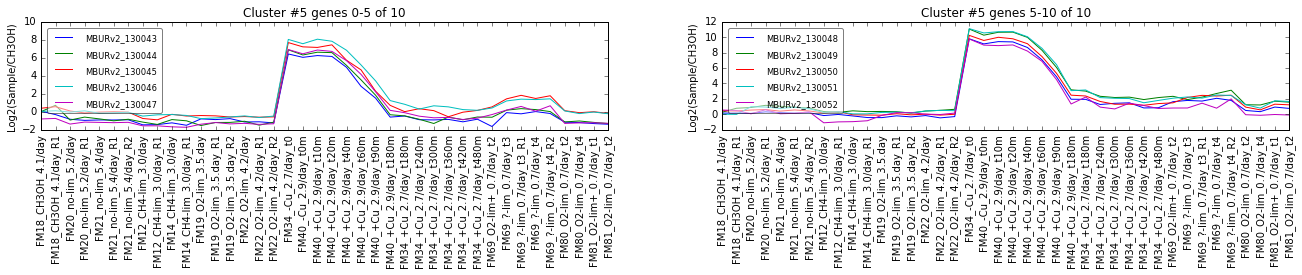

In [28]:
def draw_clst_genes(df, clst):
    
    """
    Plots the expression profile of each gene in a specified cluster. Creates subplots with 5 genes per subplot. 
    
    
    df: dataframe with normalized read counts for each sample and a "cluster" column with cluster id #
    clst: int value of the cluster number the genes of which need to be plotting across samples. 
    """
    

    fig = plt.figure(figsize = (120, 60))
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    clst_index = df.loc[df["cluster"] == clst,:].index
    
    n_cols = 10
    n_rows = 11
    
    count_subplots = 1
    for i, val in enumerate(clst_index):
        
        if i % 5 == 0:
            ax = fig.add_subplot(n_rows, n_cols, count_subplots)
            count_subplots += 1
            title_str = "Cluster #"+ str(clst) + " genes " + str(i) + "-" + str(i + 5) +" of " + str(len(clst_index))
             
        y = df.loc[val, (df.columns != "cluster")].values
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.set_ylabel("Log2(Sample/CH3OH)")
        
        ax.plot(x_axis,y, label = str(val))
        leg = ax.legend(fancybox = True ,loc='upper left')
        leg.get_frame().set_alpha(0.5) #translucent 
        
        for label in leg.get_texts():
            label.set_fontsize('small')
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("cluster " + str(clst) + " genes.pdf")
    return list(clst_index) #returns a list 
    
testa = df6_clusters #.iloc[:500,:]
the_list = draw_clst_genes(testa, 5)

In [29]:
def return_gene_list(df,clst):
    clst_index = df.loc[df["cluster"] == clst,:].index
    return list(clst_index) #returns a list 

In [30]:
def draw_gene_list(df, gene_list):
    
    fig = plt.figure(figsize = (14, 7))
    ax = fig.add_subplot(111)
    
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    title_str = "Gene expression across samples"
    
    for i in gene_list:
        y = df.loc[i, (df.columns != "cluster")].values
        ax.plot(x_axis, y, label = str(i))
        
        leg = ax.legend(fancybox = True ,loc='upper left')
        
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        #ax.set_title(title_str, fontsize = 50)
        ax.set_ylabel("Log2(Sample/CH3OH)", fontsize = 15)
        
    #fig.suptitle(title_str, fontsize = 20)
    plt.tight_layout()
    plt.show()
    fig.savefig("list_of_genes.pdf")    
    


# Exploring genes and gene clusters

### Interesting gene #1 MBURv2_200002 - expressed higher than anything when grown in the absence of Cu

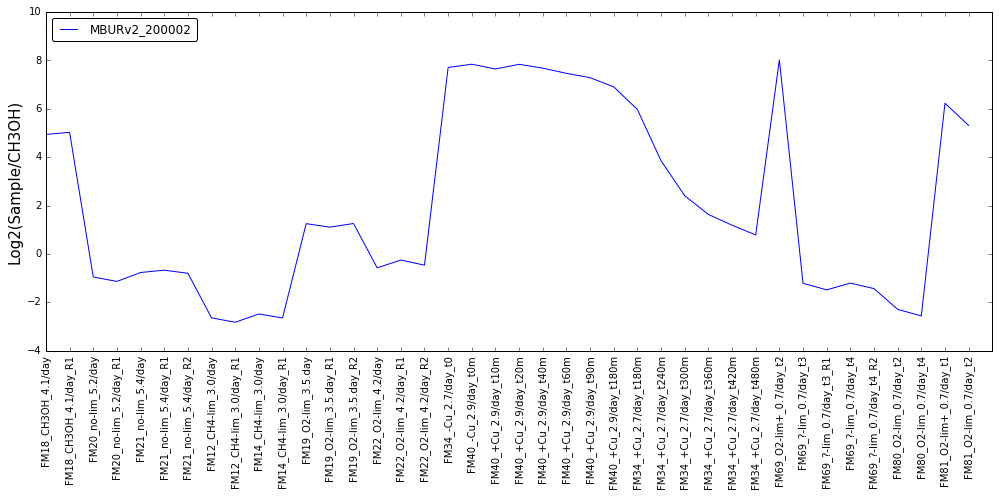

In [31]:
draw_gene_list(df6_clusters, ["MBURv2_200002"])

In [32]:
df2_cleaned_up.loc["MBURv2_200002",] #"homologs of previousl reported genes of unknown function" how far is it from pMMO?
                                    #not terible far from pMMO start_coord = 4089082, pmmo start_coord = 4145308
print(df6_clusters.loc["MBURv2_200002","cluster"])

8.0


### Plotting every single gene for in depth inspection. 

In [ ]:
#plotting all the genes (sets of 5) from each cluster to in order to start exploring. 
#warning - only run if you have 1+ hours to wait 

"""
for i in list(np.unique(labels_kmeans)):
draw_clst_genes(df6_clusters,i)
"""

In [33]:
#A dictionary with key = clust_# and values = [genes list]
clust_dict = {}

for i in list(np.unique(labels_kmeans)):
    x = "clust_"+str(i)
    gene_list = return_gene_list(df6_clusters,i)
    
    clust_dict[x] = gene_list


### Most interesting gene set also come from cluster #8

210002 is #9 highest expressed gene during the in the -Cu condition. 

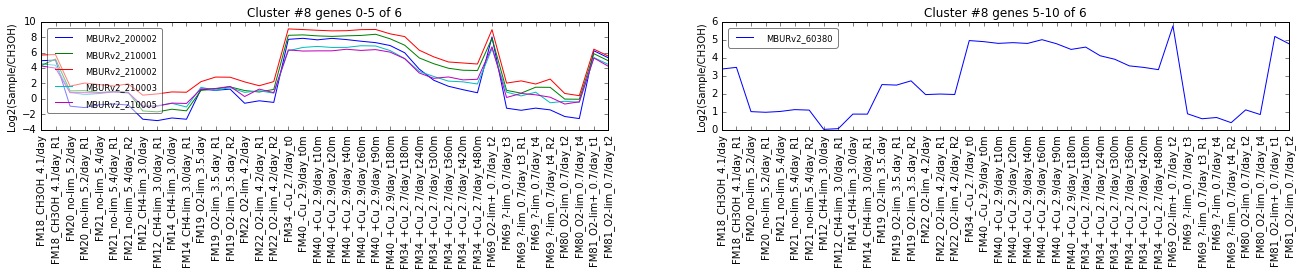

In [34]:
clst_8 = draw_clst_genes(df6_clusters, 8)

In [35]:
#lets look at what these genes are:
print(clst_8)
df2_cleaned_up.loc[clst_8, "product"]

['MBURv2_200002', 'MBURv2_210001', 'MBURv2_210002', 'MBURv2_210003', 'MBURv2_210005', 'MBURv2_60380']


locus_tag
MBURv2_200002             conserved protein of unknown function
MBURv2_210001                       protein of unknown function
MBURv2_210002    conserved exported protein of unknown function
MBURv2_210003    conserved exported protein of unknown function
MBURv2_210005             conserved protein of unknown function
MBURv2_60380                     Copper-repressible polypeptide
Name: product, dtype: object

In [36]:
df2_cleaned_up.loc[clst_8, 'end_coord'] - df2_cleaned_up.loc[clst_8, 'start_coord'] 
#for reference pMMO subunit c is 752 bases long. 

locus_tag
MBURv2_200002    911
MBURv2_210001    149
MBURv2_210002    395
MBURv2_210003    569
MBURv2_210005    653
MBURv2_60380     707
dtype: int64

### The next most interesting set comes from cluster #18 

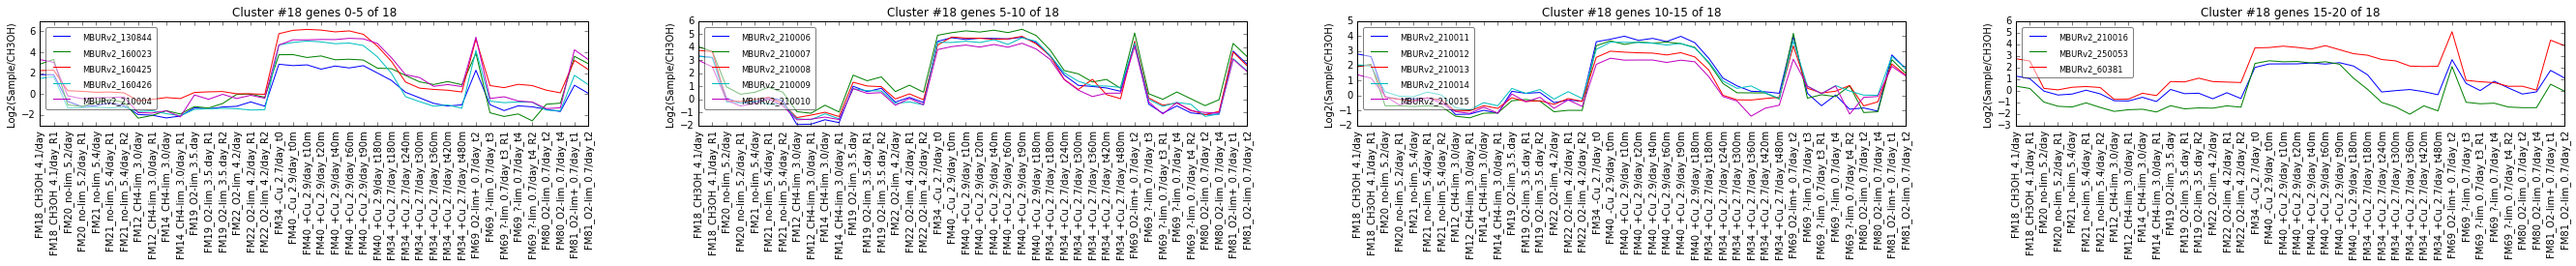

In [37]:
clst_18 = draw_clst_genes(df6_clusters, 18)

In [38]:
#lets look at what these genes are:
print(clst_18)
df2_cleaned_up.loc[clst_18, "product"]

['MBURv2_130844', 'MBURv2_160023', 'MBURv2_160425', 'MBURv2_160426', 'MBURv2_210004', 'MBURv2_210006', 'MBURv2_210007', 'MBURv2_210008', 'MBURv2_210009', 'MBURv2_210010', 'MBURv2_210011', 'MBURv2_210012', 'MBURv2_210013', 'MBURv2_210014', 'MBURv2_210015', 'MBURv2_210016', 'MBURv2_250053', 'MBURv2_60381']


locus_tag
MBURv2_130844      RNA polymerase, sigma-24 subunit, ECF subfamily
MBURv2_160023                conserved protein of unknown function
MBURv2_160425                 exported protein of unknown function
MBURv2_160426       conserved exported protein of unknown function
MBURv2_210004                conserved protein of unknown function
MBURv2_210006    General secretion pathway protein E (Modular p...
MBURv2_210007    putative Bacterial type II secretion system pr...
MBURv2_210008       conserved exported protein of unknown function
MBURv2_210009       conserved exported protein of unknown function
MBURv2_210010                conserved protein of unknown function
MBURv2_210011                 exported protein of unknown function
MBURv2_210012                conserved protein of unknown function
MBURv2_210013                conserved protein of unknown function
MBURv2_210014    putative methanol dehydrogenase regulatory pro...
MBURv2_210015       conserved membrane protein of un

In [39]:
df2_cleaned_up.loc[clst_18, 'end_coord'] - df2_cleaned_up.loc[clst_18, 'start_coord'] 

locus_tag
MBURv2_130844     503
MBURv2_160023     230
MBURv2_160425    1364
MBURv2_160426    2576
MBURv2_210004    1397
MBURv2_210006    1808
MBURv2_210007    1217
MBURv2_210008     464
MBURv2_210009    2381
MBURv2_210010    1250
MBURv2_210011    2678
MBURv2_210012    1484
MBURv2_210013     701
MBURv2_210014     905
MBURv2_210015     974
MBURv2_210016    1949
MBURv2_250053    2168
MBURv2_60381     2135
dtype: int64

### The next most interesting set comes from cluster #19

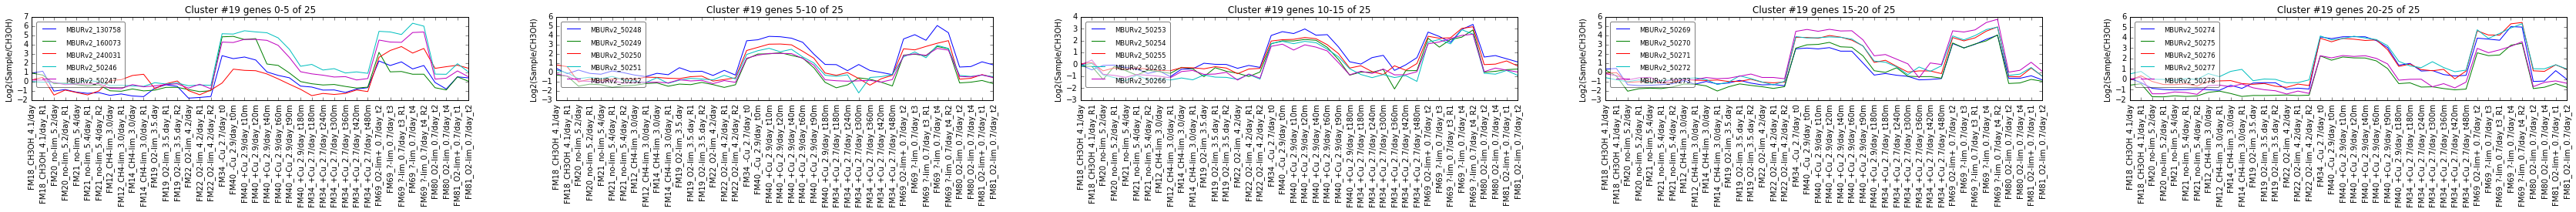

In [40]:
clst_19 = draw_clst_genes(df6_clusters, 19)

In [41]:
#lets look at what these genes are:
print(clst_19)
df2_cleaned_up.loc[clst_19, "product"]

['MBURv2_130758', 'MBURv2_160073', 'MBURv2_240031', 'MBURv2_50246', 'MBURv2_50247', 'MBURv2_50248', 'MBURv2_50249', 'MBURv2_50250', 'MBURv2_50251', 'MBURv2_50252', 'MBURv2_50253', 'MBURv2_50254', 'MBURv2_50255', 'MBURv2_50263', 'MBURv2_50266', 'MBURv2_50269', 'MBURv2_50270', 'MBURv2_50271', 'MBURv2_50272', 'MBURv2_50273', 'MBURv2_50274', 'MBURv2_50275', 'MBURv2_50276', 'MBURv2_50277', 'MBURv2_50278']


locus_tag
MBURv2_130758                conserved protein of unknown function
MBURv2_160073                conserved protein of unknown function
MBURv2_240031       conserved membrane protein of unknown function
MBURv2_50246        Methyl-accepting chemotaxis sensory transducer
MBURv2_50247                                          CheW protein
MBURv2_50248     Chemotaxis response regulator protein-glutamat...
MBURv2_50249     PBS lyase HEAT domain protein repeat-containin...
MBURv2_50250                Chemotaxis protein methyltransferase 2
MBURv2_50251                   Response regulator receiver protein
MBURv2_50252             CheA signal transduction histidine kinase
MBURv2_50253                 conserved protein of unknown function
MBURv2_50254     chemotaxis regulator transmitting signal to fl...
MBURv2_50255     putative Methyl-accepting chemotaxis sensory t...
MBURv2_50263                  Chemotaxis protein methyltransferase
MBURv2_50266     Response regulator receiver sensor 

In [42]:
df2_cleaned_up.loc[clst_19, 'end_coord'] - df2_cleaned_up.loc[clst_19, 'start_coord'] 

locus_tag
MBURv2_130758     713
MBURv2_160073     596
MBURv2_240031    1100
MBURv2_50246     1919
MBURv2_50247     1598
MBURv2_50248     1052
MBURv2_50249      638
MBURv2_50250      842
MBURv2_50251      371
MBURv2_50252     2372
MBURv2_50253      248
MBURv2_50254      374
MBURv2_50255     1223
MBURv2_50263      842
MBURv2_50266     1208
MBURv2_50269     1505
MBURv2_50270      215
MBURv2_50271     1211
MBURv2_50272      368
MBURv2_50273      323
MBURv2_50274     2168
MBURv2_50275     3014
MBURv2_50276      560
MBURv2_50277      269
MBURv2_50278      347
dtype: int64

### Marys list of genes with lower expression are in the noise of clusters 2, 9 and 10. 

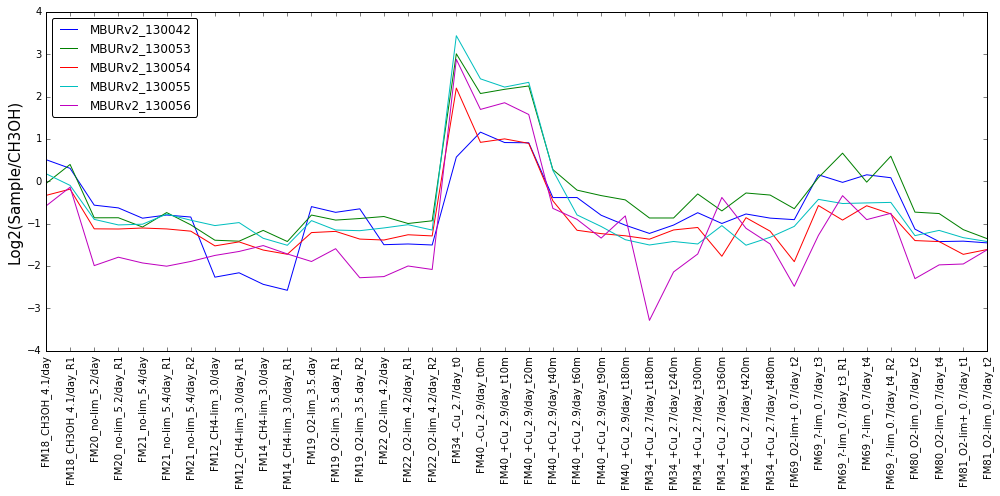

In [43]:
draw_gene_list(df6_clusters, Marys_list_low)

### Looking at list of genes one by one

In [44]:


"""
cluster 19 - DONE 
cluster 18 - DONE 
cluster 17 - DONE 
cluster 16 - DONE - Low expression for a gene under methane limitation
                    ["MBURv2_tRNA36"]  - check
cluster 15 - DONE - Low expression for a list of genes under methane limitation 
                    ["MBURv2_130036", "MBURv2_130301", "MBURv2_20027",
                    "MBURv2_60306"] - check 
cluster 14 - DONE - High expression for a list of genes under methane limitation
                    ["MBURv2_160508", "MBURv2_160511", "MBURv2_160512", "MBURv2_20016"] - check
cluster 13 - DONE - Cu inducible genes [HIGH INTEREST - low/mid magnitude change]
                    ["MBURv2_210047"] - check
                    Low expression under methane limitation
                    ["MBURv2_30044"] - check
cluster 12 - DONE - Low expression under methane limitation (methane limitation repessible)
                    [] - check
cluster 11 - DONE - Low expression under methane limitation (methane limitation repressible)
                    ["MBURv2_130282", "MBURv2_130680","MBURv2_20353", "MBURv2_240103"] - check
                    High expression under oxygen limitation (induction by oxygen limitation) - strong signature
                    ["MBURv2_160513", "MBURv2_160510", "MBURv2_160509", "MBURv2_160506"] - check
                    Low expression by oxygen limited + nitrate + metal limitation (fermentation) - strong signature
                    ["MBURv2_50230"] - check 
                    STRANGE expression signature
                    ["MBURv2_60021", "MBURv2_60166"] - check
cluster 10 - DONE - High expression by oxygen limited + nitrate + metal limitation (fermentation) - strong signature
                    ["MBURv2_160505"] - check
                  - Both represible by methane limitation and inducible by O2limitation(fermentation) - strong signature
                    ["MBURv2_210507"] - check
cluster 9 - DONE - strong signature for slow growth (fermentation related work)
                    ["MBURv2_130805", "MBURv2_160300", "MBURv2_180008", "MBURv2_240030", "MBURv2_240029"] - ignore
                 - low expression under CH4-lim represible under methane limitation
                    ["MBURv2_50025"] - check
                 - high expression only during FM69 (oxygen, nutrient limitation)
                    ["MBURv2_80055"] - check
cluster 8 - DONE - one of the key clusters Cu related 
cluster 7 - DONE - All genes are highly inducible under the FM69 fermentation condtion, first point only. 
cluster 6 - DONE - high expression only during FM69 (oxygen, nutrient limitation)
                    ["MBURv2_130285","MBURv2_60112", "MBURv2_60173", "MBURv2_60175"] - check
                 - Repressible genes during methane limitation 
                    ["MBURv2_160525"] - check
                 - genes are highly inducible under the FM69 fermentation condtion, first point only
                     ["MBURv2_20285", "MBURv2_20286"] - check
cluster 5 - DONE - Marys high list 
cluster 4 - DONE - genes are highly inducible under the FM69 fermentation condtion, first point only
                     ["MBURv2_160507", "MBURv2_160515"] - check 
                 - low expression under CH4-lim represible under methane limitation
                     ["MBURv2_tRNA6", "MBURv2_tRNA33"] - check
cluster 3 - DONE - genes are highly inducible under the FM69 fermentation condtion, first point only
                     ["MBURv2_130079", "MBURv2_130076"]-check
                   STRANGE expression signature
                     ["MBURv2_130615"] - check 
                   high expression only during FM69 (oxygen, nutrient limitation)
                     ["MBURv2_30042", "MBURv2_30043"] - check 

cluster 2 - DONE -  High expression by oxygen limited + nitrate + metal limitation (fermentation) - strong signature
                     ["MBURv2_160504"] - check
                    genes are highly inducible under the FM69 fermentation condtion, first point only
                     ["MBURv2_210077", "MBURv2_210078", "MBURv2_210080"] - check 
cluster 1 - DONE - Highly expressed during slow growth rate runs (FM69, FM80, FM81)
                     ["MBURv2_130205"] - ignore
                 - genes are highly inducible under the FM69 fermentation condtion, first point only
                     ["MBURv2_160168", "MBURv2_20287", "MBURv2_210083"] - check
                 - low expression under CH4-lim represible under methane limitation
                     ["MBURv2_210209"] - check
                 - High expression by oxygen limited + nitrate + metal limitation (fermentation) - strong signature
                     ["MBURv2_30040", "MBURv2_30041", "MBURv2_60107"] - check
                     
cluster 0 - DONE - genes are very repressible under the FM69 fermentation condtion, first point only
                    ["MBURv2_160153","MBURv2_30150", "MBURv2_30156", "MBURv2_30157", "MBURv2_30161", "MBURv2_30160",
                    "MBURv2_30158"] - check
                    
"""

#OK now lets organize these

###METHANE LIMITED####
tRNA = ["MBURv2_tRNA36", "MBURv2_tRNA6", "MBURv2_tRNA33",  "MBURv2_tRNA11", "MBURv2_tRNA1"]

methane_limit1 = [ "MBURv2_50025", "MBURv2_160525", "MBURv2_210209"]
methane_limit2 = ["MBURv2_20353",  "MBURv2_240103","MBURv2_130036", "MBURv2_130301", "MBURv2_20027","MBURv2_30044"
              ,"MBURv2_20353", "MBURv2_130282", "MBURv2_130680", "MBURv2_240103"]

###Oxygen LImited###

O2_limit_induced = ["MBURv2_160513", "MBURv2_160510", "MBURv2_160509", "MBURv2_160506", 
                    "MBURv2_160508", "MBURv2_160511", "MBURv2_160512", "MBURv2_160504", "MBURv2_160515"]


###FM69 induced during O2 limitation###

FM69_ind_O2lim_only_1 = ["MBURv2_20285", "MBURv2_20286","MBURv2_130079", "MBURv2_130076","MBURv2_160168", "MBURv2_20287", 
                     "MBURv2_210083"]

FM69_ind_O2lim_only_2 = ["MBURv2_210078","MBURv2_210080","MBURv2_210077","MBURv2_160505", "MBURv2_210507", "MBURv2_160507"]


###FM69 repressed under O2 limitation###

FM69_rep_O2_lim_only = ["MBURv2_160153","MBURv2_30150", "MBURv2_30156", "MBURv2_30157", "MBURv2_30161",
                              "MBURv2_30160","MBURv2_30158","MBURv2_50230"]


###FM69 - all conditions###


FM69_induced_all = ["MBURv2_80055", "MBURv2_130285","MBURv2_60112", "MBURv2_60173", "MBURv2_60175",
                   "MBURv2_30042", "MBURv2_30043", "MBURv2_30040", "MBURv2_30041", "MBURv2_60107"]

### induced by both: all FM69 conditions, and all methane limited runs 


CH4lim_ferm_induced = ["MBURv2_60021", "MBURv2_60166" ]


CH4lim_ferm_repressed = ["MBURv2_130615"]




### Running list of interesting genes. 

In [45]:
#List of genes that appear to be involved in the Cu transition

#why are these interesting? 

gene_list_P1 = ['MBURv2_200002', 
                
                'MBURv2_210001',
                'MBURv2_210002',  
                'MBURv2_210003',
                'MBURv2_210004', 
                'MBURv2_210005', 
                'MBURv2_210006',
                'MBURv2_210007',
                'MBURv2_210008',
                'MBURv2_210009',
                'MBURv2_210010', 
                'MBURv2_210011',
                'MBURv2_210012',
                'MBURv2_210013',
                'MBURv2_210014',
                'MBURv2_210015',
                'MBURv2_210016',
                

                
                'MBURv2_160023',
                'MBURv2_160425',
                'MBURv2_160426',
                
                'MBURv2_250053',
                
                'MBURv2_60381',
                
                'MBURv2_130758',
                'MBURv2_130844',
                'MBURv2_160073',
                
                'MBURv2_240031', 
                
                'MBURv2_50246', #chemotaxis 
                'MBURv2_50247', 
                'MBURv2_50248', 
                'MBURv2_50249', 
                'MBURv2_50250', 
                'MBURv2_50251', 
                'MBURv2_50252', 
                'MBURv2_50253', 
                'MBURv2_50254', 
                'MBURv2_50255', 
                'MBURv2_50263', 
                'MBURv2_50266', 
                'MBURv2_50269', 
                'MBURv2_50270', 
                'MBURv2_50271', 
                'MBURv2_50272', 
                'MBURv2_50273', 
                'MBURv2_50274', 
                'MBURv2_50275', 
                'MBURv2_50276', 
                'MBURv2_50277', 
                'MBURv2_50278',
                
                "MBURv2_160072", #found manually, cluster #2
                "MBURv2_130836", #found manually, cluster #2
                "MBURv2_130849", #found manually, cluster #2
                
                "MBURv2_60382",   #found manually, cluster #1 (similar profile as cluster 18)
                
                "MBURv2_210047", #found manually cluster #13 
                
               ]

### Additional Plots and Tables 

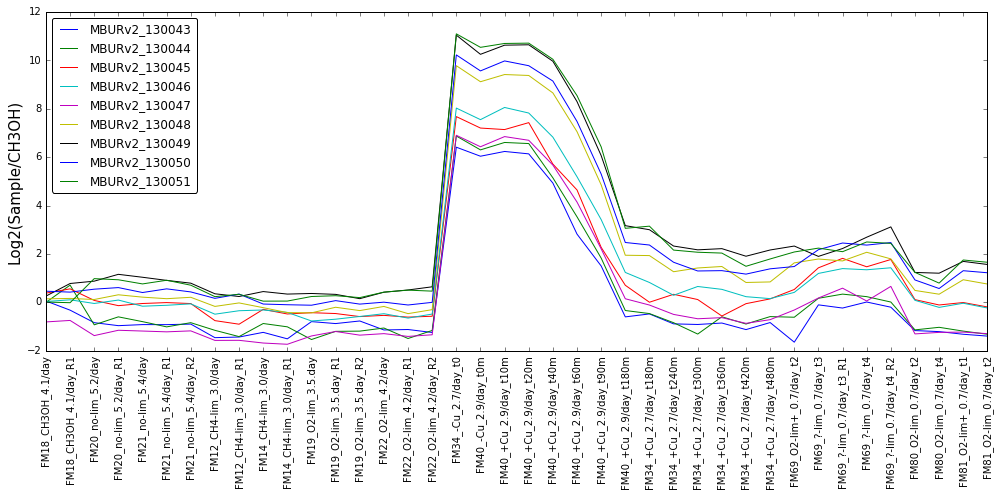

In [46]:
#Drawing the lst of Marys genes: 
list_to_draw = ["MBURv2_130043","MBURv2_130044","MBURv2_130045","MBURv2_130046","MBURv2_130047",
"MBURv2_130048","MBURv2_130049","MBURv2_130050","MBURv2_130051"]

draw_gene_list(df6_clusters, list_to_draw)

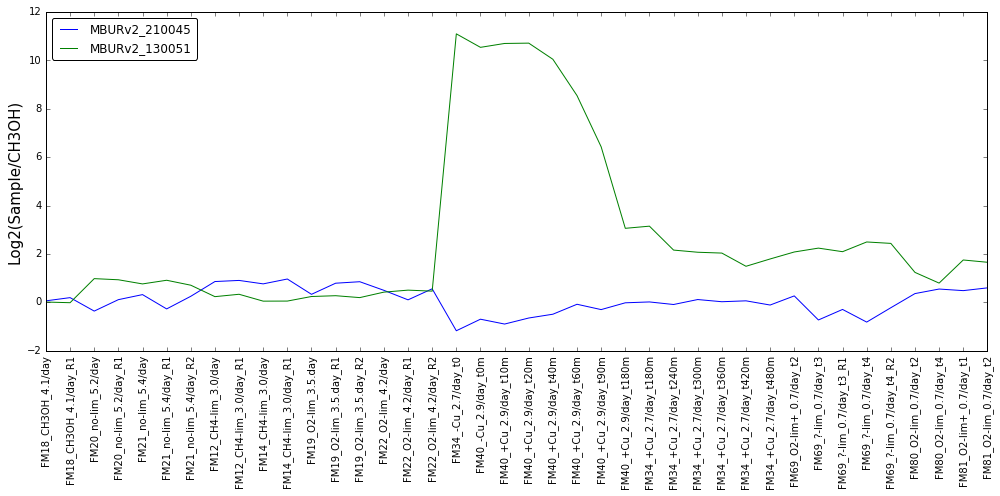

In [47]:
#drawing expression of pMMO and sMMO
draw_gene_list(df6_clusters, ["MBURv2_210045", "MBURv2_130051"])